# Simple Battleship VQE

This notebook demonstrate how to use VQE to solve simple battleship puzzle using Qiskit

## 1. Initialize Battleship

In [1]:
from battleship import Battleship

In [2]:
bs = Battleship([2, 1], [1, 2])

In [3]:
bs.draw()

Simple Battleship
size: 2 x 2 

|   |   | 2
|   |   | 1
  1   2   


## 2. Get Qubit Operations

In [4]:
qubitOps, shift = bs.getQubitOps()

In [5]:
print(qubitOps.print_operators())
print('shift:', shift)

IIIZ	1.0
IIZI	2.0
IZII	0.0
ZIII	1.0
IIZZ	0.5
ZZII	0.5
IZIZ	0.5
ZIZI	0.5

shift: 4.0


## 3. Init Qiskit VQE 

In [6]:
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.components.variational_forms import RY
from vqe import VQEWithHistory

In [7]:
spsa = SPSA(max_trials=300)
ry = RY(qubitOps.num_qubits, depth=1, entanglement='linear')
vqe = VQEWithHistory(qubitOps, ry, spsa, 'paulis')

## 4. Run Simulation

In [8]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance

In [9]:
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'))
result, history = vqe.run(quantum_instance)

In [10]:
result

{'num_optimizer_evals': None,
 'min_val': -4.0,
 'opt_params': array([-3.14416218e+00,  2.13470525e+00,  2.07410920e-03, -9.72923801e-01,
        -1.73383156e-03, -1.00564210e+00,  1.11419670e-02, -2.16867427e+00]),
 'eval_time': 118.96605682373047,
 'eval_count': 651,
 'energy': -4.0,
 'eigvals': array([-4.]),
 'min_vector': {'1011': 1024},
 'eigvecs': array([{'1011': 1024}], dtype=object)}

In [11]:
len(history)

651

## 5. Analyse the Result

In [22]:
from helpers import printResultSummary, getSolutionFromResult, plotEnergyHistory

In [20]:
printResultSummary(result, shift)

VQE Result
- Running time: 118.97 sec
- Evaluation count: 651
- Final energy: 0.0
- Solution: 1011


In [21]:
bs.draw(getSolutionFromResult(result))

Simple Battleship
size: 2 x 2 

| x | x | 2
|   | x | 1
  1   2   


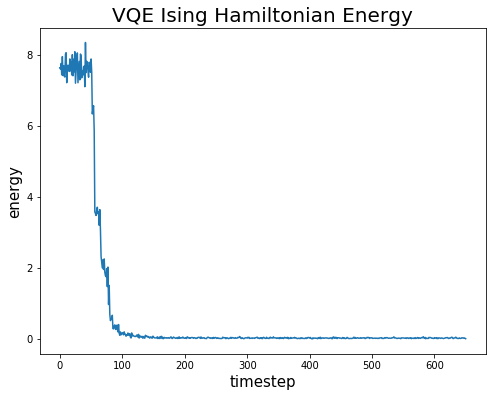

In [23]:
plotEnergyHistory(history, shift)